# Text Abstractions: Articles Skimming

In [1]:
# Importing TF and checking the version
import tensorflow as tf

print(tf.__version__)

2.10.1


Re-using PubMed dataset, published by Franck Dernoncourt. Dataset contains 20K records, with numbers replaced by "@" sign.

In [2]:
# Checking all the file names in the target directory
import os

data_dir = "PubMed_20K_RCT_NumReplaced/"
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['PubMed_20K_RCT_NumReplaced/dev.txt',
 'PubMed_20K_RCT_NumReplaced/test.txt',
 'PubMed_20K_RCT_NumReplaced/train.txt']

In [3]:
# Creating function to read lines of code
def get_lines(filename):
    with open(filename, "r") as f:
        return f.readlines()

In [4]:
# Reading train file lines
train_lines = get_lines(data_dir + "train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [5]:
# Checking number of lines
len(train_lines)

210040

In [6]:
# Creating function to preprocess input texts
def preprocess_text_with_line_numbers(filename):
    input_lines = get_lines(filename)
    abstract_lines = "" # Creating empty abstract
    abstract_samples = [] # Creating empty list of abstracts

    for line in input_lines:
        if line.startswith("###"): # Check if it's an ID line
            abstract_id = line
            abstract_lines = "" # Reset if line is an ID line

        elif line.isspace(): # Check if it's a new line
            abstract_line_split = abstract_lines.splitlines()
            # Iterating through each line
            for abstract_line_number, abstract_line in enumerate(abstract_line_split):
                line_data = {} # Create empty dictionary for each line
                target_text_split = abstract_line.split("\t")
                line_data["target"] = target_text_split[0] # Get target label
                line_data["text"] = target_text_split[1].lower() # Get target text
                line_data["line_number"] = abstract_line_number # What line text appears on
                line_data["total_lines"] = len(abstract_line_split) - 1 # How many lines are there
                abstract_samples.append(line_data)

        else:
            abstract_lines += line
    
    return abstract_samples

In [7]:
# Getting and preprocessing data
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt")
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")
print(len(train_samples), len(val_samples), len(test_samples))

180040 30212 30135


In [8]:
# Checking first abstract of train samples
train_samples[:14]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [9]:
# Checking the output
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [10]:
# Checking distribution of labels
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

<AxesSubplot:ylabel='Frequency'>

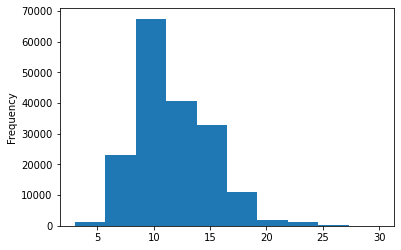

In [11]:
# Checking length of differnt lines
train_df.total_lines.plot.hist()

### Get list of sentences

In [12]:
# Converting abstract textx into lists
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()

len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [13]:
# Viewing first 10 train sentences
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

### Make numeric labels

In [14]:
# One-hot labels
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [15]:
# Converting into tensor
tf.constant(train_labels_one_hot)

<tf.Tensor: shape=(180040, 5), dtype=float64, numpy=
array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])>

In [16]:
# Extract labels and encode them into integers
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [17]:
# Getting class names
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_

num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

### Model 0 - Baseline model

In [18]:
# Building baseline model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tf-idf", TfidfVectorizer()),
    ("clf", MultinomialNB())    
])

# Fitting the pipeline
model_0.fit(
    X=train_sentences,
    y=train_labels_encoded
)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [19]:
# Evaluating the baseline model
model_0.score(
    X=val_sentences,
    y=val_labels_encoded
)

0.7218323844829869

In [20]:
# Making predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [21]:
# Doanload helpder function
from DanielBourke_HelperFunctions import calculate_results

In [22]:
# Calculate baseline results
baseline_results = calculate_results(
    y_true=val_labels_encoded,
    y_pred=baseline_preds
)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

### Preparing data for the deep sequence models

In [23]:
# Getting required libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [24]:
# How long is each sequence on average
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_lens = np.mean(sent_lens)
avg_sent_lens

26.338269273494777

(array([4.2075e+04, 8.3771e+04, 3.6877e+04, 1.0945e+04, 3.9310e+03,
        1.4450e+03, 5.6000e+02, 2.2600e+02, 1.0100e+02, 4.5000e+01,
        2.0000e+01, 1.2000e+01, 9.0000e+00, 1.0000e+01, 6.0000e+00,
        2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1.  ,  15.75,  30.5 ,  45.25,  60.  ,  74.75,  89.5 , 104.25,
        119.  , 133.75, 148.5 , 163.25, 178.  , 192.75, 207.5 , 222.25,
        237.  , 251.75, 266.5 , 281.25, 296.  ]),
 <BarContainer object of 20 artists>)

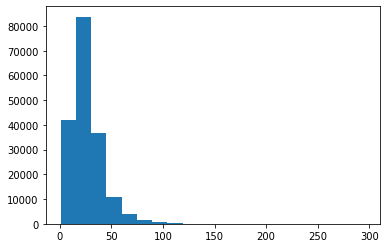

In [25]:
# Visualising sentence distribution
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=20)

In [26]:
# Identifying what length covers 95% of all samples
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

55

In [27]:
# Maximum sentence length
max(sent_lens)

296

In [28]:
# Setting max token numbers
max_tokens = 68000

In [29]:
# Create text vectoriser
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectoriser = TextVectorization(
    max_tokens=max_tokens, # Number of words in vocabulary
    output_sequence_length=output_seq_len # Desired output length of vectorised sequences
)

In [30]:
# Adapt text vectoriser to training sentences
text_vectoriser.adapt(train_sentences)

In [31]:
# Test vectoriser on random sentences
import random
target_sentence = random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"Length of text: {len(target_sentence.split())}")
print(f"Verctorised text: {text_vectoriser([target_sentence])}")

Text:
efficacy assessments included responder rate ( primary assessment ) and seizure freedom rate during the open-label period .
Length of text: 18
Verctorised text: [[  79  657  121 3555   78   56  250    3 2369 3507   78   52    2  570
   173    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]


In [32]:
# Number of words in training vocabulary
rct_20k_text_vocab = text_vectoriser.get_vocabulary()
print(f"Number of words in vocab: {len(rct_20k_text_vocab)}")
print(f"5 most common words: {rct_20k_text_vocab[:5]}")
print(f"5 least common words: {rct_20k_text_vocab[-5:]}")

Number of words in vocab: 64841
5 most common words: ['', '[UNK]', 'the', 'and', 'of']
5 least common words: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [33]:
# Getting config of text vectoriser
text_vectoriser.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'batch_input_shape': (None,),
 'dtype': 'string',
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None}

### Custom text embedding

In [34]:
# Creating token embedding layer
token_embed = layers.Embedding(
    input_dim=len(rct_20k_text_vocab),
    output_dim=128,
    mask_zero=True,
    name="token_embedding"
)

In [35]:
# Showing example of embedding
print(f"Sentence before embedding:\n{target_sentence}")
vectorised_sentence = text_vectoriser([target_sentence])
print(f"Sentence after vectorisation:\n{vectorised_sentence}")
embedded_sentence = token_embed(vectorised_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}")
print(f"Embedded sentence's shape: {embedded_sentence.shape}")

Sentence before embedding:
efficacy assessments included responder rate ( primary assessment ) and seizure freedom rate during the open-label period .
Sentence after vectorisation:
[[  79  657  121 3555   78   56  250    3 2369 3507   78   52    2  570
   173    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]
Sentence after embedding:
[[[-0.04021907 -0.00514125 -0.03620311 ...  0.01768157 -0.00386542
   -0.01114257]
  [ 0.01373542  0.04410477  0.00554705 ... -0.00394718  0.04725385
   -0.02958998]
  [ 0.02619079  0.01803115  0.02528762 ... -0.01363767 -0.03842638
    0.0075432 ]
  ...
  [-0.00836192 -0.03855474 -0.03281172 ...  0.04006212 -0.00770153
   -0.00591946]
  [-0.00836192 -0.03855474 -0.03281172 ...  0.04006212 -0.00770153
   -0.00591946]
  [-0.00836192 -0.03855474 -0.03281172 ...  0.04006212 -0.00770153
   -0.00591946]]]
Em

### Creating datasets

In [36]:
# Turning data into TensorFlow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((
    train_sentences,
    train_labels_one_hot
))

valid_dataset = tf.data.Dataset.from_tensor_slices((
    val_sentences,
    val_labels_one_hot
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    test_sentences,
    test_labels_one_hot
))

train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [37]:
# Shape and sample of train labels
train_labels_one_hot.shape, train_labels_one_hot[0]

((180040, 5), array([0., 0., 0., 1., 0.]))

In [38]:
# Turn dataset into prefetched one
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

### Model 1 - Conv1D with token embeddings

In [39]:
# Create 1D Conv model
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectoriser(inputs) # Vectorising text inputs
token_embeddings = token_embed(text_vectors) # Create embedding
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) # Condense the output
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compiling the model
model_1.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [40]:
# Checking the model structure
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 55, 128)          8299648   
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 325   

In [41]:
# Fitting the model
history_1 = model_1.fit(
    train_dataset,
    steps_per_epoch=int(0.1 * len(train_dataset)),
    epochs=3,
    validation_data=valid_dataset,
    validation_steps=int(len(valid_dataset))
)

Epoch 1/3
562/562 [==============================] - 44s 76ms/step - loss: 0.9048 - accuracy: 0.6441 - val_loss: 0.6791 - val_accuracy: 0.7461
Epoch 2/3
562/562 [==============================] - 33s 58ms/step - loss: 0.6496 - accuracy: 0.7605 - val_loss: 0.6315 - val_accuracy: 0.7759
Epoch 3/3
562/562 [==============================] - 35s 63ms/step - loss: 0.6111 - accuracy: 0.7769 - val_loss: 0.5922 - val_accuracy: 0.7890


In [42]:
# Evaluating the dataset
model_1.evaluate(valid_dataset)

945/945 [==============================] - 7s 7ms/step - loss: 0.5922 - accuracy: 0.7890


[0.5921791791915894, 0.7890242338180542]

In [43]:
# Making predictions
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_pred_probs, model_1_pred_probs.shape

945/945 [==============================] - 7s 8ms/step


(array([[4.4071046e-01, 1.5219641e-01, 6.6841759e-02, 3.0767480e-01,
         3.2576609e-02],
        [4.4803387e-01, 2.7616331e-01, 1.7066145e-02, 2.4851583e-01,
         1.0220930e-02],
        [1.4969786e-01, 6.0761906e-03, 2.3298950e-03, 8.4183592e-01,
         6.0120790e-05],
        ...,
        [9.7781012e-06, 5.4008071e-04, 1.0076064e-03, 5.6006888e-06,
         9.9843699e-01],
        [5.1734064e-02, 4.9844441e-01, 8.9344919e-02, 5.8747657e-02,
         3.0172887e-01],
        [1.4826925e-01, 7.2785378e-01, 5.1708139e-02, 3.8677990e-02,
         3.3490788e-02]], dtype=float32),
 (30212, 5))

In [44]:
# Converting pred probs to classes
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1], dtype=int64)>

In [45]:
# Calculating model 1 results
model_1_results = calculate_results(
    y_true=val_labels_encoded,
    y_pred=model_1_preds
)
model_1_results

{'accuracy': 78.90242287832649,
 'precision': 0.7860944439105335,
 'recall': 0.789024228783265,
 'f1': 0.7865709597378678}

### Model 2 - Feature extraction

In [46]:
# Downloading pretrained USE model from TensorFlow Hub
import tensorflow_hub as hub

tf_hub_embedding_layer = hub.KerasLayer(
    "https://tfhub.dev/google/universal-sentence-encoder/4",
    trainable=False,
    name="universal_sentence_encoder"
)

In [48]:
# Testing pretrained embedding on random sentence
random_train_sentence = random.choice(train_sentences)
print(f"Random sentence:\n{random_train_sentence}")
use_embedded_sentence = tf_hub_embedding_layer([random_train_sentence])
print(f"Sentence after embedding:\n{use_embedded_sentence[0][:30]}")
print(f"Length of embedded sentence:\n{len(use_embedded_sentence[0])}")

Random sentence:
patients with mycobacterium avium complex pulmonary disease are frequently administered a combination of clarithromycin , ethambutol , and rifampicin .
Sentence after embedding:
[-0.05360923  0.07841774  0.03170758  0.06590915 -0.00841318 -0.01185077
  0.04996864 -0.04292641  0.00407306 -0.01424577  0.09925987  0.04531551
 -0.04100705  0.07923847 -0.00256072 -0.05174247 -0.09930068 -0.0283448
 -0.06362417  0.07756805 -0.02684527  0.04056051 -0.04865991 -0.03966914
  0.042454    0.00706473  0.06377786 -0.01482319 -0.06416307  0.02687887]
Length of embedded sentence:
512


In [49]:
# Building feature extraction model
inputs = layers.Input([], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs)
x = layers.Dense(128, activation="relu")(pretrained_embedding)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_2 = tf.keras.Model(
    inputs=inputs,
    outputs=outputs,
    name="model_2_USE_feature_extract"
)

# Compiling the model
model_2.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [50]:
# Model details
model_2.summary()

Model: "model_2_USE_feature_extract"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [51]:
# Fitting the model
history_2 = model_2.fit(
    train_dataset,
    epochs=3,
    steps_per_epoch=int(0.1 * len(train_dataset)),
    validation_data=valid_dataset,
    validation_steps=int(0.1 * len(valid_dataset))
)

Epoch 1/3
562/562 [==============================] - 27s 30ms/step - loss: 0.9152 - accuracy: 0.6517 - val_loss: 0.7941 - val_accuracy: 0.6922
Epoch 2/3
562/562 [==============================] - 17s 31ms/step - loss: 0.7676 - accuracy: 0.7028 - val_loss: 0.7535 - val_accuracy: 0.7038
Epoch 3/3
562/562 [==============================] - 17s 30ms/step - loss: 0.7507 - accuracy: 0.7115 - val_loss: 0.7380 - val_accuracy: 0.7141


In [52]:
# Evaluating on the whole dataset
model_2.evaluate(valid_dataset)

945/945 [==============================] - 19s 20ms/step - loss: 0.7404 - accuracy: 0.7144


[0.7403731346130371, 0.7143850326538086]

In [53]:
# Making predictions
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_pred_probs

945/945 [==============================] - 15s 15ms/step


array([[0.4270342 , 0.38290352, 0.00194496, 0.1813926 , 0.00672461],
       [0.36881575, 0.48041263, 0.00310214, 0.14481613, 0.00285329],
       [0.23385125, 0.13327529, 0.02097395, 0.5781675 , 0.03373201],
       ...,
       [0.00230515, 0.00692165, 0.07654591, 0.00139034, 0.9128369 ],
       [0.00444344, 0.04396182, 0.18940035, 0.00167246, 0.76052195],
       [0.17103937, 0.26591888, 0.49680746, 0.00788973, 0.05834445]],
      dtype=float32)

In [54]:
# Converting pred probabilities to labels
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2], dtype=int64)>

In [55]:
# Calculating model results
model_2_results = calculate_results(
    y_true=val_labels_encoded,
    y_pred=model_2_preds
)
model_2_results

{'accuracy': 71.43850125777837,
 'precision': 0.7148874213441412,
 'recall': 0.7143850125777836,
 'f1': 0.711036699100345}

### Model 3 - Conv1D with char embedding

In [56]:
# Building function to split sentences into characters
def split_chars(text):
    return " ".join(list(text))

In [61]:
# Sampling split functionality
" ".join(list(train_sentences[0]))

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [63]:
# Splitting data
trains_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]

trains_chars[:5]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [64]:
# What's the average character length?
chars_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(chars_lens)
mean_char_len

149.3662574983337

(array([1.41175e+05, 3.71110e+04, 1.60000e+03, 1.27000e+02, 2.10000e+01,
        5.00000e+00, 1.00000e+00]),
 array([1.00000000e+00, 1.98857143e+02, 3.96714286e+02, 5.94571429e+02,
        7.92428571e+02, 9.90285714e+02, 1.18814286e+03, 1.38600000e+03]),
 <BarContainer object of 7 artists>)

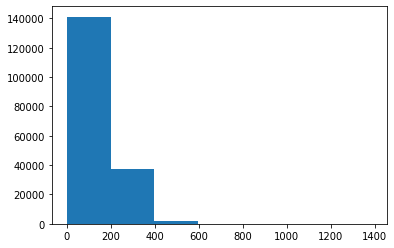

In [65]:
# Checking sequence distribution
import matplotlib.pyplot as plt
plt.hist(chars_lens, bins=7)

In [66]:
# Finding what covers 95%
output_seq_char_len = int(np.percentile(chars_lens, 95))
output_seq_char_len

290

In [67]:
# Getting all keyboard characters
import string

alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [75]:
# Creating char-level token vectoriser
NUM_CHAR_TOKENS = len(alphabet) + 2 # Adding 2 for space and OOV (Out of Vocab, 'UNK')
char_vectoriser = TextVectorization(
    max_tokens=NUM_CHAR_TOKENS,
    #standardize=None,
    output_sequence_length=output_seq_char_len,
    name="char_vectoriser"
)

In [76]:
# Adapting char vectoriser to training characters
char_vectoriser.adapt(trains_chars)

In [77]:
# Checking character vocab stats
char_vocab = char_vectoriser.get_vocabulary()
print(f"Number of different characters: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 less common characters: {char_vocab[-5:]}")

Number of different characters: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 less common characters: ['k', 'x', 'z', 'q', 'j']


In [80]:
# Testing text vectoriser
random_train_chars = random.choice(trains_chars)
print(random_train_chars)
vectorised_chars = char_vectoriser([random_train_chars])
print(vectorised_chars)

s i x   s u s c e p t i b l e   m a r e s   w e r e   s e l e c t e d   b a s e d   o n   t h e i r   u t e r i n e   i n f l a m m a t o r y   r e s p o n s e   t o   i n s e m i n a t i o n   .
tf.Tensor(
[[ 9  4 24  9 16  9 11  2 14  3  4 22 12  2 15  5  8  2  9 20  2  8  2  9
   2 12  2 11  3  2 10 22  5  9  2 10  7  6  3 13  2  4  8 16  3  2  8  4
   6  2  4  6 17 12  5 15 15  5  3  7  8 19  8  2  9 14  7  6  9  2  3  7
   4  6  9  2 15  4  6  5  3  4  7  6  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

In [79]:
# Creating char embedding layer
char_embed = layers.Embedding(input_dim=len(char_vocab), output_dim=25, mask_zero=True, name="char_embed")

In [81]:
# Testing embed layer
print(f"Charified text:\n{random_train_chars}")
char_embed_example = char_embed(char_vectoriser([random_train_chars]))
print(f"Embedded chars:\n{char_embed_example}")
print(f"Char embeded shape:\n{char_embed_example.shape}")

Charified text:
s i x   s u s c e p t i b l e   m a r e s   w e r e   s e l e c t e d   b a s e d   o n   t h e i r   u t e r i n e   i n f l a m m a t o r y   r e s p o n s e   t o   i n s e m i n a t i o n   .
Embedded chars:
[[[ 0.03255515  0.04936013 -0.0148327  ... -0.03781278 -0.02163666
   -0.04571768]
  [ 0.0447549   0.03444542 -0.03237917 ... -0.00594807 -0.03649412
   -0.0274581 ]
  [ 0.01916273  0.03433916  0.01136503 ... -0.03907472 -0.00911572
   -0.02971734]
  ...
  [ 0.00695001 -0.03372552  0.03735659 ...  0.02930349 -0.00463206
   -0.0392083 ]
  [ 0.00695001 -0.03372552  0.03735659 ...  0.02930349 -0.00463206
   -0.0392083 ]
  [ 0.00695001 -0.03372552  0.03735659 ...  0.02930349 -0.00463206
   -0.0392083 ]]]
Char embeded shape:
(1, 290, 25)


In [87]:
# Building Conv1D model
inputs = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectoriser(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_3 = tf.keras.Model(
    inputs=inputs,
    outputs=outputs,
    name="model_3_conv1d_char_embedding"
)

# Compiling the model
model_3.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [88]:
# Checking our model
model_3.summary()

Model: "model_3_conv1d_char_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectoriser (TextVector  (None, 290)              0         
 ization)                                                        
                                                                 
 char_embed (Embedding)      (None, 290, 25)           700       
                                                                 
 conv1d_3 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_5 (Dense)             (None, 5

In [89]:
# Create char level dataset
train_char_dataset = tf.data.Dataset.from_tensor_slices((trains_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [90]:
# Fitting the model
history_3 = model_3.fit(
    train_char_dataset,
    steps_per_epoch=int(0.1 * len(train_char_dataset)),
    epochs=3,
    validation_data=val_char_dataset,
    validation_steps=int(0.1 * len(val_char_dataset))
)

Epoch 1/3
562/562 [==============================] - 14s 24ms/step - loss: 1.2495 - accuracy: 0.4767 - val_loss: 1.1170 - val_accuracy: 0.5465
Epoch 2/3
562/562 [==============================] - 12s 22ms/step - loss: 1.0932 - accuracy: 0.5522 - val_loss: 1.0238 - val_accuracy: 0.5841
Epoch 3/3
562/562 [==============================] - 17s 29ms/step - loss: 1.0122 - accuracy: 0.5955 - val_loss: 0.9558 - val_accuracy: 0.6217


In [91]:
# Making predictions
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs

945/945 [==============================] - 7s 7ms/step


array([[0.18395191, 0.21662803, 0.1685301 , 0.3660575 , 0.06483245],
       [0.15811849, 0.34317324, 0.07044259, 0.35975638, 0.0685093 ],
       [0.13470396, 0.165648  , 0.11210781, 0.54809755, 0.03944271],
       ...,
       [0.04061187, 0.09976385, 0.3467524 , 0.0568346 , 0.45603734],
       [0.0545577 , 0.15712272, 0.3946345 , 0.05164406, 0.342041  ],
       [0.4716443 , 0.24531133, 0.07929273, 0.19170314, 0.01204854]],
      dtype=float32)

In [92]:
# Converting pred probs to labels
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([3, 3, 3, ..., 4, 2, 0], dtype=int64)>

In [93]:
# Calculating results for model 3
model_3_results = calculate_results(
    y_true=val_labels_encoded,
    y_pred=model_3_preds
)
model_3_results

{'accuracy': 61.54177148153052,
 'precision': 0.6235069074211983,
 'recall': 0.6154177148153052,
 'f1': 0.6059912960244059}

### Model 4 - Combining token embedding and character embedding

In [94]:
# 1 - Setting up token model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(
    inputs=token_inputs,
    outputs=token_outputs,
)

# 2 - Setting up char model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectoriser(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(
    inputs=char_inputs,
    outputs=char_bi_lstm
)

# 3 - Concatenating token and char models
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output, char_model.output])

# 4 - Creating output layer with dropout of 50%
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(128, activation="relu")(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)

# 5 - Constructing our model
model_4 = tf.keras.Model(
    inputs=[token_model.input, char_model.input],
    outputs=output_layer,
    name="model_4_token_and_char_embeddings"
)

In [95]:
# Checking model details
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vectoriser (TextVectoriza  (None, 290)         0           ['char_input[0][0]']             
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   [

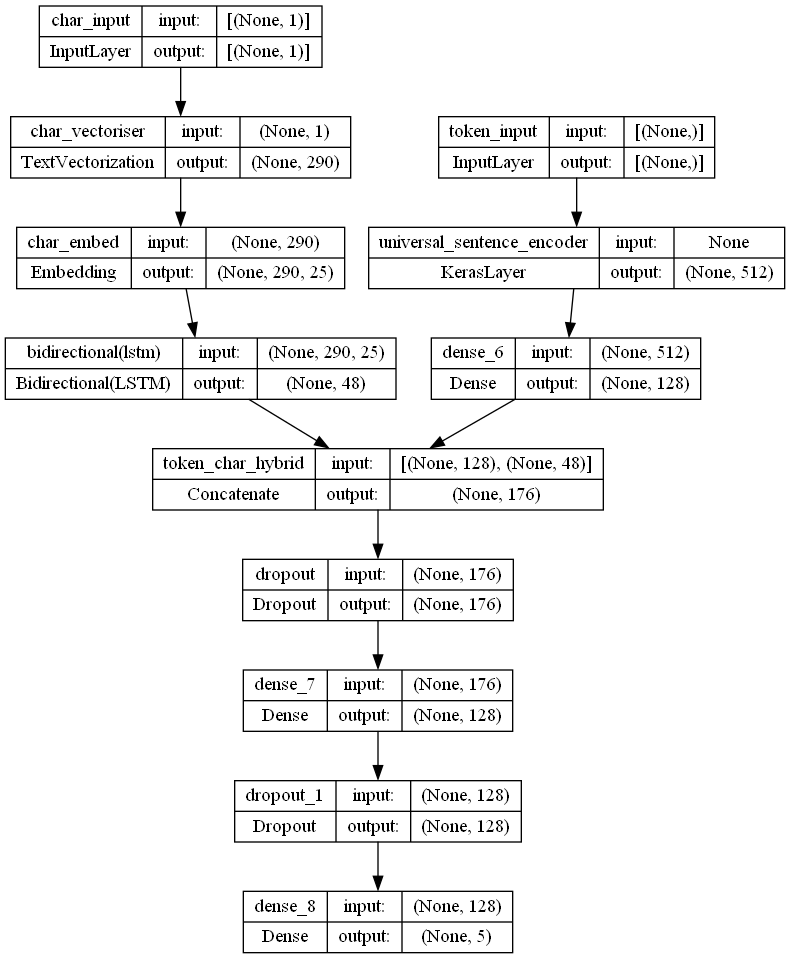

In [97]:
# Plotting the model
from keras.utils import plot_model
plot_model(model_4, show_shapes=True)

In [98]:
# Compiling the model
model_4.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [99]:
# Combining token and char data into a dataset
train_token_char_data = tf.data.Dataset.from_tensor_slices((train_sentences, trains_chars))
train_token_char_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_token_char_dataset = tf.data.Dataset.zip((train_token_char_data, train_token_char_labels))

# Prefetching and batching dataset
train_token_char_dataset = train_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [100]:
# Combining token and char data into a dataset
val_token_char_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_token_char_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_token_char_dataset = tf.data.Dataset.zip((val_token_char_data, val_token_char_labels))

# Prefetching and batching dataset
val_token_char_dataset = val_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [101]:
# Checking our datasets
train_token_char_dataset, val_token_char_dataset

(<PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [102]:
# Fiting the model
history_4 = model_4.fit(
    train_token_char_dataset,
    epochs=3,
    steps_per_epoch=int(0.1 * len(train_token_char_dataset)),
    validation_data=val_token_char_dataset,
    validation_steps=int(0.1 * len(val_token_char_dataset))
)

Epoch 1/3
562/562 [==============================] - 113s 178ms/step - loss: 0.9831 - accuracy: 0.6055 - val_loss: 0.7815 - val_accuracy: 0.7015
Epoch 2/3
562/562 [==============================] - 88s 156ms/step - loss: 0.7975 - accuracy: 0.6908 - val_loss: 0.7251 - val_accuracy: 0.7207
Epoch 3/3
562/562 [==============================] - 95s 169ms/step - loss: 0.7750 - accuracy: 0.7027 - val_loss: 0.6996 - val_accuracy: 0.7370


In [103]:
# Evaluate the model
model_4.evaluate(val_token_char_dataset)

945/945 [==============================] - 41s 43ms/step - loss: 0.7009 - accuracy: 0.7325


[0.7009232640266418, 0.7324572801589966]

In [104]:
# Making predictions
model_4_pred_probs = model_4.predict(val_token_char_dataset)
model_4_pred_probs

945/945 [==============================] - 41s 40ms/step


array([[4.2016780e-01, 3.5532612e-01, 3.6442564e-03, 2.1341883e-01,
        7.4430578e-03],
       [2.8189355e-01, 5.3460735e-01, 2.7557518e-03, 1.7923491e-01,
        1.5085174e-03],
       [3.2592565e-01, 1.2709515e-01, 2.8039349e-02, 4.9713522e-01,
        2.1804636e-02],
       ...,
       [8.7064126e-04, 1.1912973e-02, 4.4069093e-02, 4.2764525e-04,
        9.4271964e-01],
       [9.6542090e-03, 7.0817858e-02, 2.1190517e-01, 8.1267208e-03,
        6.9949603e-01],
       [3.2182455e-01, 3.7157243e-01, 2.0095260e-01, 3.3521824e-02,
        7.2128542e-02]], dtype=float32)

In [106]:
# Converting pred probabilities to labels
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 1], dtype=int64)>

In [107]:
# Checking results
model_4_results = calculate_results(
    y_true=val_labels_encoded,
    y_pred=model_4_preds
)
model_4_results

{'accuracy': 73.24573017344102,
 'precision': 0.7360413747722953,
 'recall': 0.7324573017344101,
 'f1': 0.7308153588438817}